### Analyses of output files from the pipeline optimus v6.0.0+
#### Aim of this part of analysis is to normalize the data

#### Load necessary libraries and useful functions

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from src.plot import pca_variance_ratio_plots as elbow_plots

In [22]:
import warnings
warnings.filterwarnings("ignore") 

#### Data Loading

In [38]:
input_h5ad = "../scAtlas/tmp/10k_pbmc_v3_out_filtered_cellbenderDefault_lowQcell_scDblFinderSinglet_CellCycle.h5ad"
adata = sc.read_h5ad(input_h5ad)

In [39]:
display(adata)

AnnData object with n_obs × n_vars = 10214 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'scDblFinder_score', 'scDblFinder_class', 'S_score', 'G2M_score', 'phase'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'barcode_indices_for_latents', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_tes

###### check barcode and gene names

In [10]:
display(adata.var_names)
display(adata.obs_names)

Index(['DDX11L1', 'WASH7P', 'MIR6859-1', 'MIR1302-2HG', 'MIR1302-2', 'FAM138A',
       'AL627309.6', 'OR4G11P', 'OR4F5', 'AL627309.1',
       ...
       'pRNA-11', 'RNA5-8S5', 'pRNA-12', 'RNA5-8SN2', 'AC007325.3',
       'AC007325.1', 'AC007325.4', 'AC007325.2', 'U6-36', 'U1-15'],
      dtype='object', name='gene_name', length=58347)

Index(['CAGAGCCTCTTCGATT', 'TACATTCTCCGTAGTA', 'ATCACGAAGGGACACT',
       'ATCTTCATCCCGAATA', 'TGTTACTTCTACAGGT', 'CCGGTAGTCACGACTA',
       'TTCGGTCCAGTTGTCA', 'ATCCACCAGTAGGAAG', 'TGTGCGGCATTCCTAT',
       'ACTATCTCATAACGGG',
       ...
       'CTTTCGGAGATCGCTT', 'CCCTCTCCACAGCTTA', 'CCACAAAAGCGTCTCG',
       'TTCTGTACAGCAGTTT', 'CACCGTTCAATCCTAG', 'CCTAAGACAGCGAACA',
       'CTCCTTTGTACAGTTC', 'CCTACGTAGCACCTGC', 'GAGGGATAGTAAACGT',
       'TATTGGGGTCATACCA'],
      dtype='object', name='barcode', length=10214)

#### Normalization

In [40]:
adata.layers["celbender_counts"] = adata.X

Shifted logarithm

In [41]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

#### Write output to h5ad

In [42]:
# definie the adata.x as the log1p_norm
adata.X = adata.layers["celbender_counts"]

In [43]:
PATH_TO_OUTPUT = "../scAtlas/tmp/10k_pbmc_v3_out_normalize_layer.h5ad"
adata.write_h5ad(PATH_TO_OUTPUT)

#### Normalization evaluation

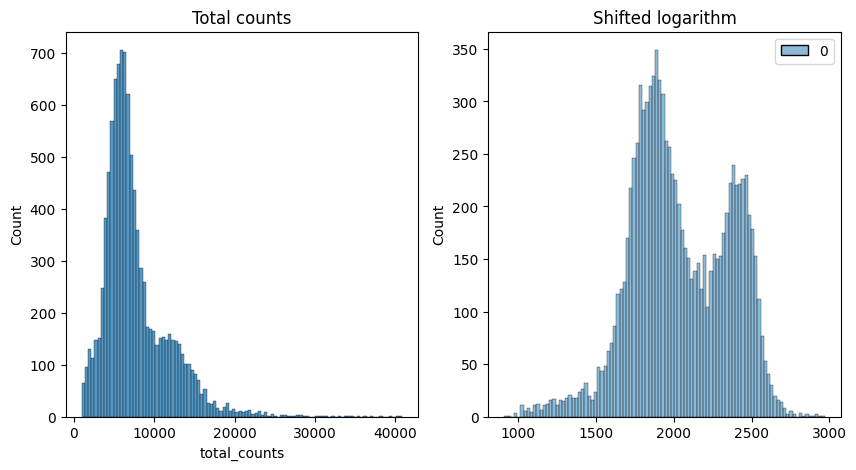

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [24]:
seed = 22

#### The following analyses are optional and can be skipped

Normalizated counts

In [27]:
# sc.tl.pca doesn't work with layers
adata_norm = adata.copy()
adata_norm.X = adata.layers["log1p_norm"]
sc.tl.pca(adata_norm, svd_solver="arpack", random_state=seed, n_comps=100)

PC1: 12.244436928314485%
PC2: 3.009863571134384%
PC3: 1.9842295584042369%
PC4: 1.4597506020934068%
PC5: 0.6984836804050184%
PC6: 0.542972876267924%
PC7: 0.460190751343173%
PC8: 0.37522896009229745%
PC9: 0.3165220655154735%
PC10: 0.25359801520828684%
PC11: 0.21443543797177755%
PC12: 0.18461987845927164%
PC13: 0.14679556850468858%
PC14: 0.1437730364438779%
PC15: 0.12039312059339015%
PC16: 0.1136930323015112%
PC17: 0.10839766884841744%
PC18: 0.0984786810122649%
PC19: 0.09098590333884951%
PC20: 0.08954767173963606%
PC21: 0.08716141104966221%
PC22: 0.08520397902673345%
PC23: 0.07746722161353238%
PC24: 0.07093305167748727%
PC25: 0.0693843822865075%
PC26: 0.06848456473003954%
PC27: 0.06437759292460753%
PC28: 0.06377120894575909%
PC29: 0.06086048391534015%
PC30: 0.059558220461124994%
PC31: 0.059176052249205836%
PC32: 0.058078698036232085%
PC33: 0.05776147484410611%
PC34: 0.05614454842157291%
PC35: 0.05520493326861331%
PC36: 0.054664733083369964%
PC37: 0.05352660351467238%
PC38: 0.0531088201576

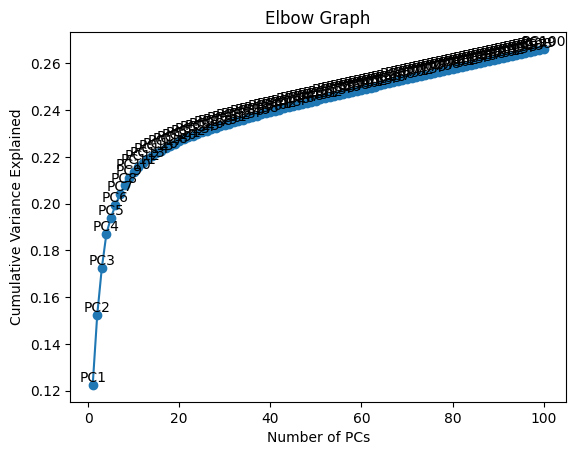

In [28]:
elbow_plots(adata_norm, 100)

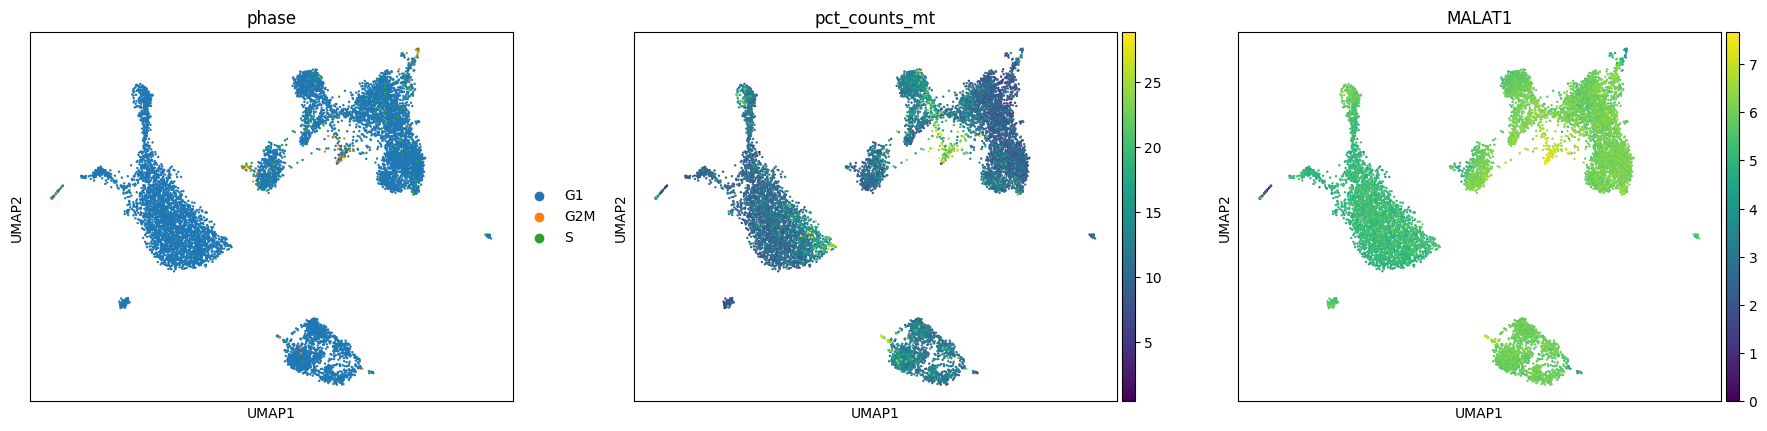

In [29]:
sc.pp.neighbors(adata_norm, n_neighbors=15, use_rep="X_pca",random_state=seed)
sc.tl.umap(adata_norm, random_state=seed)
sc.pl.umap(adata_norm ,color=["phase", "pct_counts_mt", "MALAT1"])

Raw counts

In [31]:
adata.X = adata.layers["celbender_counts"]

In [32]:
sc.tl.pca(adata, svd_solver="arpack", random_state=seed)

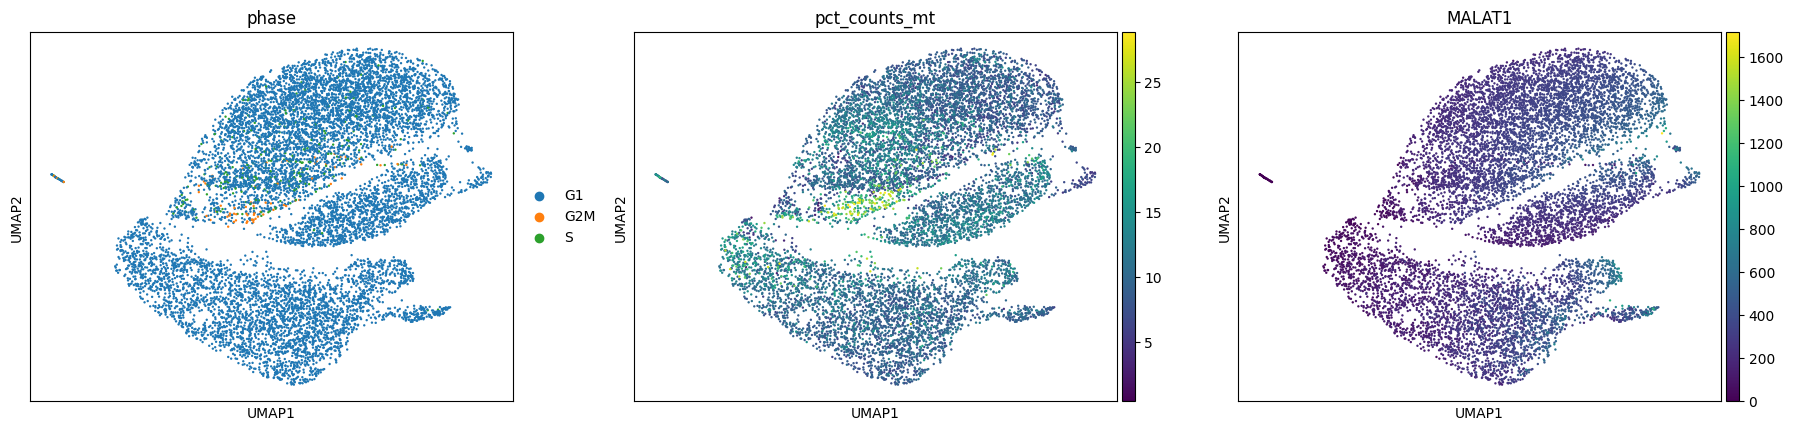

In [34]:
sc.pp.neighbors(adata, n_neighbors=15, use_rep="X_pca", random_state=seed)
sc.tl.umap(adata, random_state=seed)
sc.pl.umap(adata ,color=["phase", "pct_counts_mt", "MALAT1"])

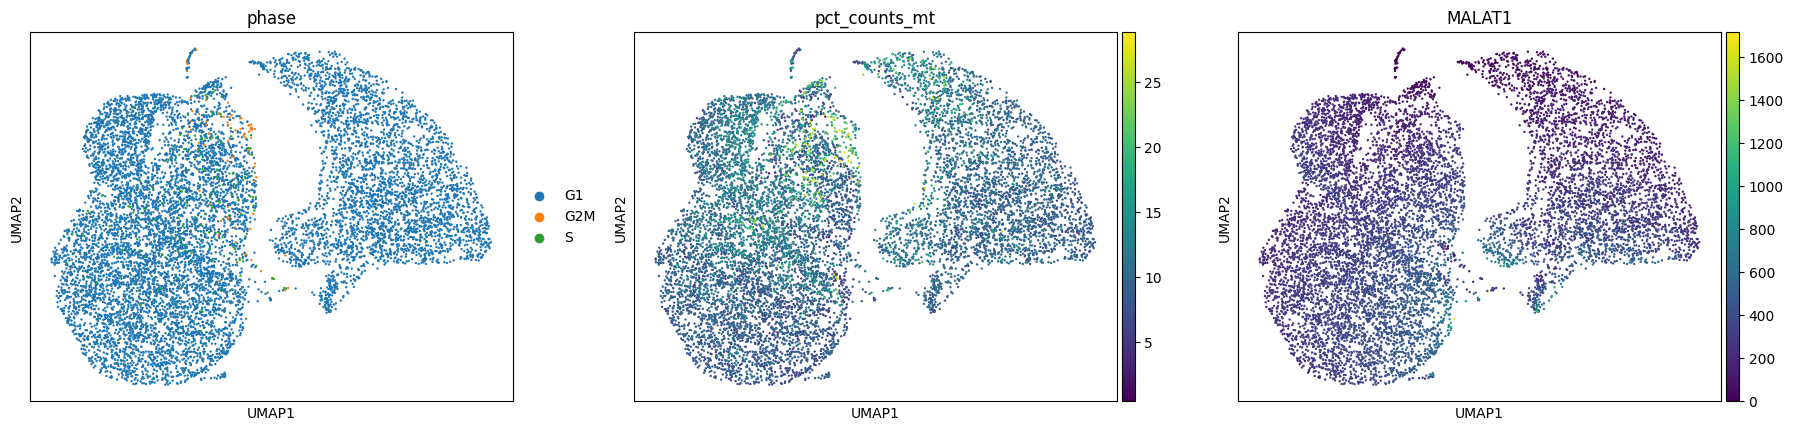

In [35]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=10, random_state=seed)
sc.tl.umap(adata, random_state=seed)
sc.pl.umap(adata ,color=["phase", "pct_counts_mt", "MALAT1"])